
PROJECT: WINE QUALITY PREDICTION

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WineQT.csv')

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [4]:
df.shape
print(f'Dataset is having {df.shape[0]} rows & {df.shape[1]} columns.')

Dataset is having 1143 rows & 13 columns.


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
df.duplicated().any()

False

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

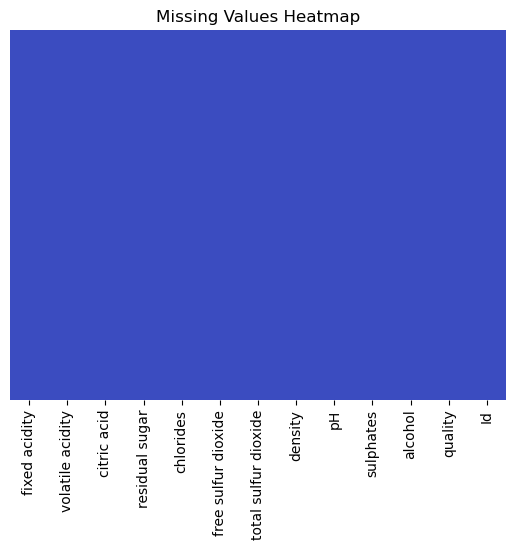

In [10]:


# Assuming you have a DataFrame 'df' with missing values
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='coolwarm')
plt.title("Missing Values Heatmap")
plt.show()



In [11]:
df.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'Id']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [14]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique(),'\n')

No. of unique values in fixed acidity is 91 

No. of unique values in volatile acidity is 135 

No. of unique values in citric acid is 77 

No. of unique values in residual sugar is 80 

No. of unique values in chlorides is 131 

No. of unique values in free sulfur dioxide is 53 

No. of unique values in total sulfur dioxide is 138 

No. of unique values in density is 388 

No. of unique values in pH is 87 

No. of unique values in sulphates is 89 

No. of unique values in alcohol is 61 

No. of unique values in quality is 6 

No. of unique values in Id is 1143 



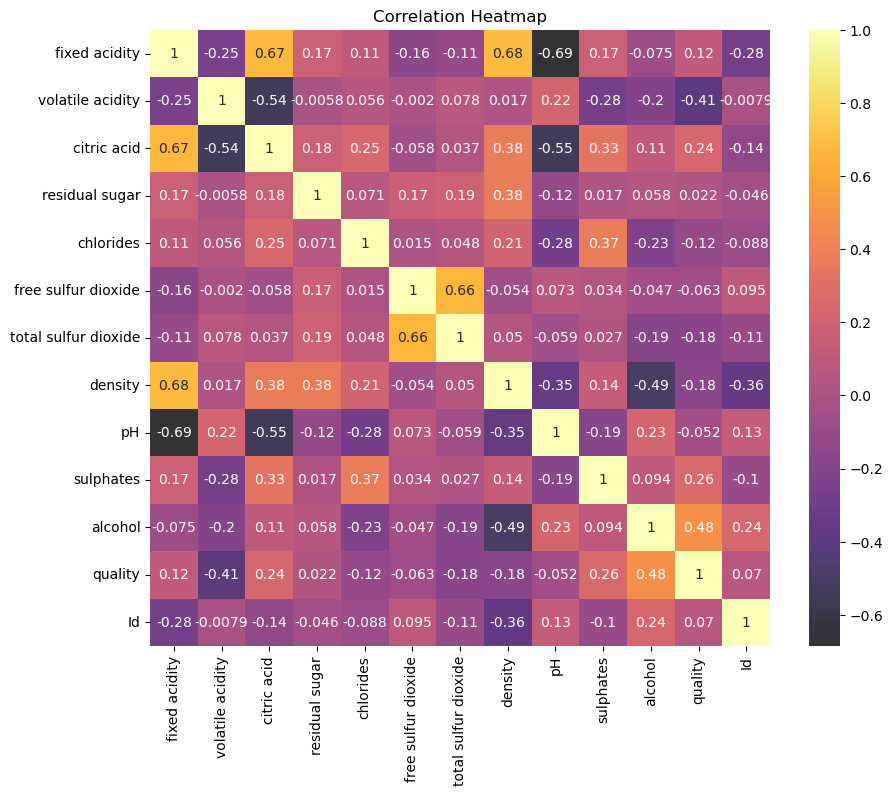

In [15]:


# Assuming you have a DataFrame 'df' with correlation values
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='inferno', annot=True, alpha=0.8)
plt.title("Correlation Heatmap")
plt.show()


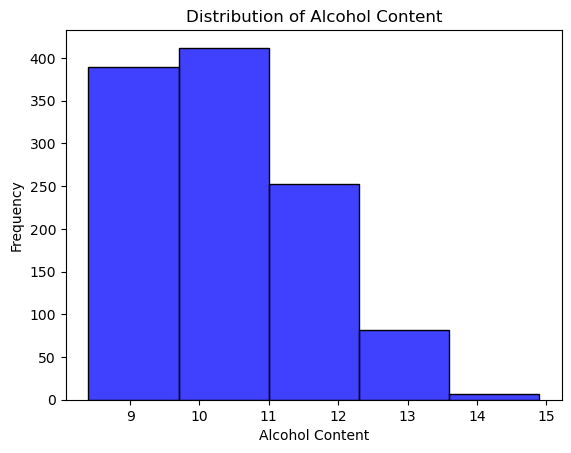

In [16]:
# Assuming you have a DataFrame 'df' with an 'alcohol' column
sns.histplot(df.alcohol, bins=5, color='blue')
plt.xlabel("Alcohol Content")
plt.ylabel("Frequency")
plt.title("Distribution of Alcohol Content")
plt.show()

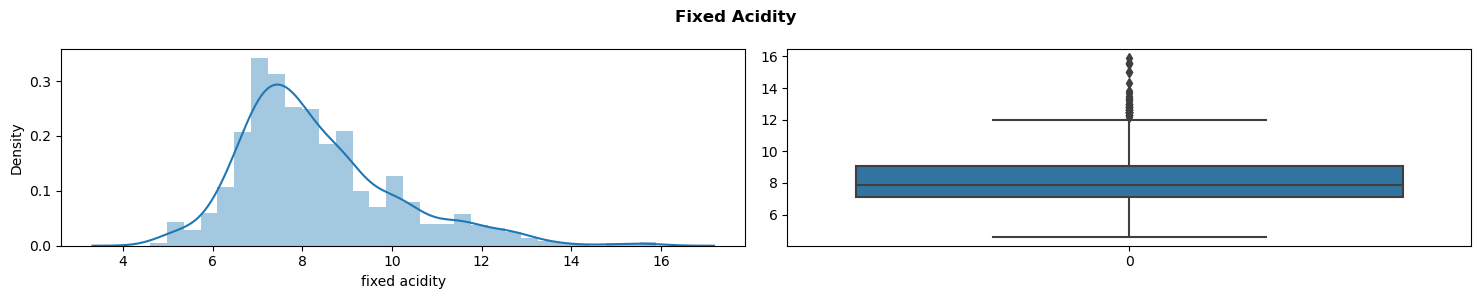

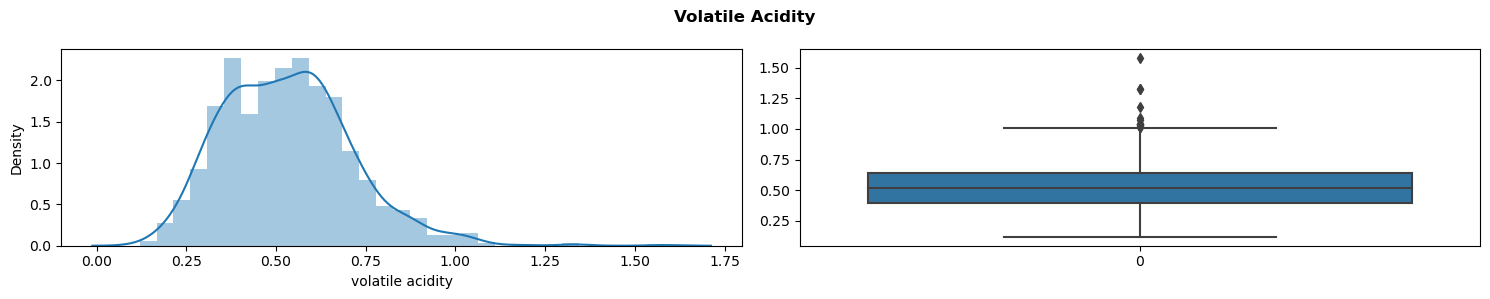

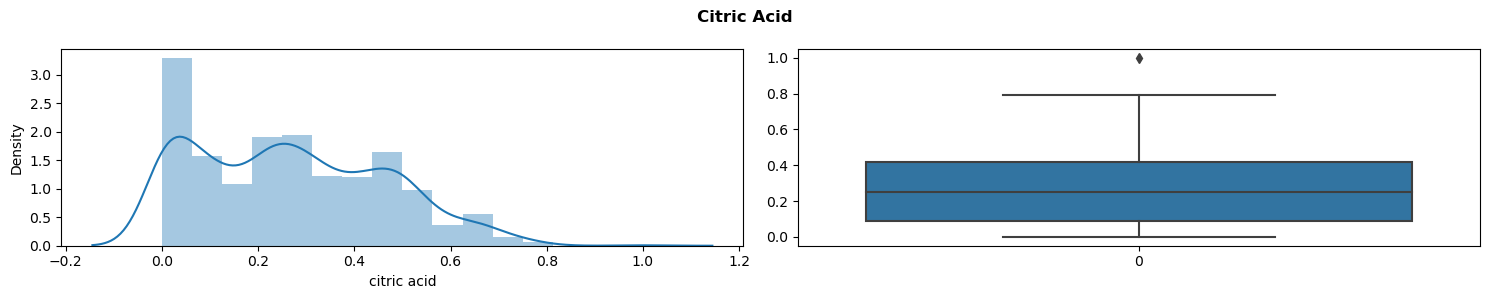

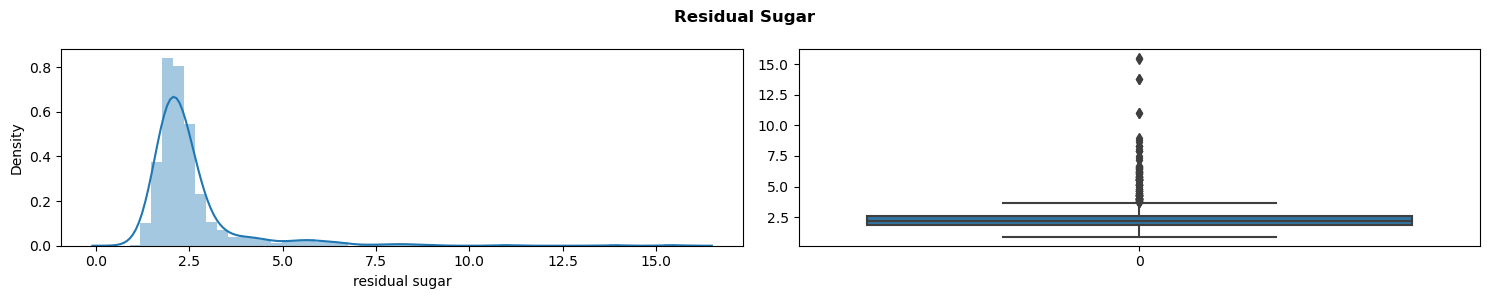

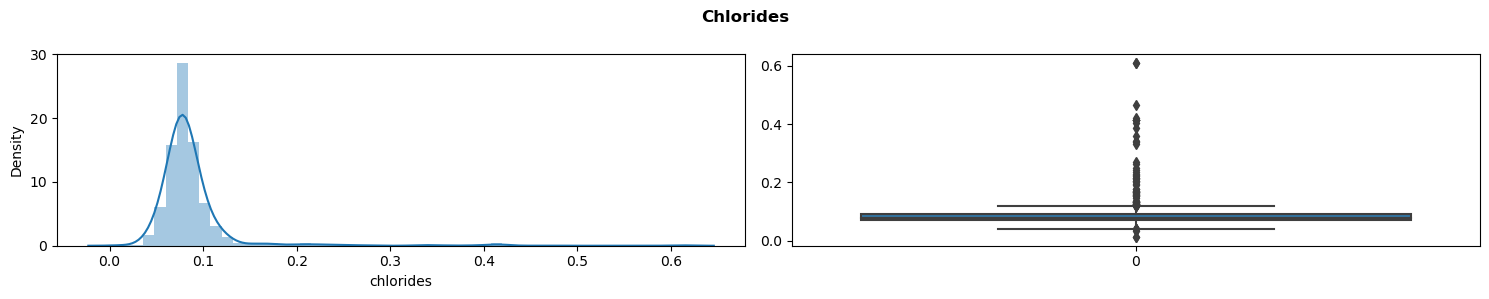

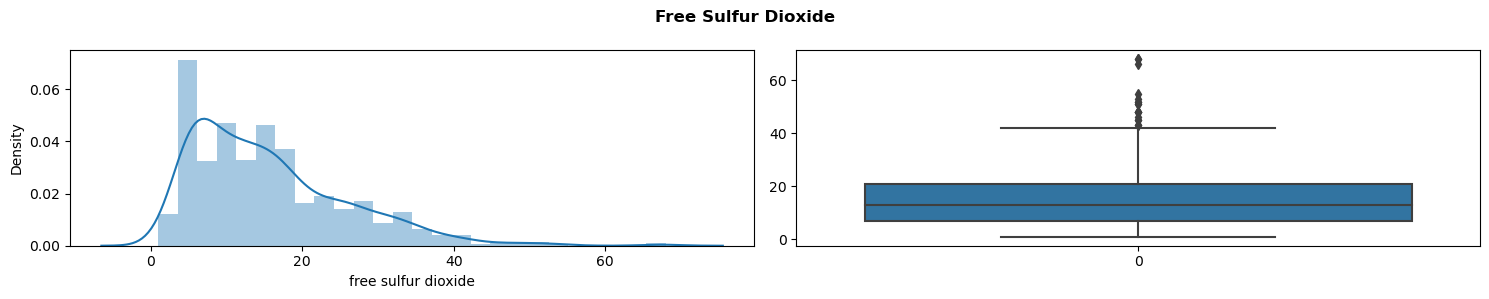

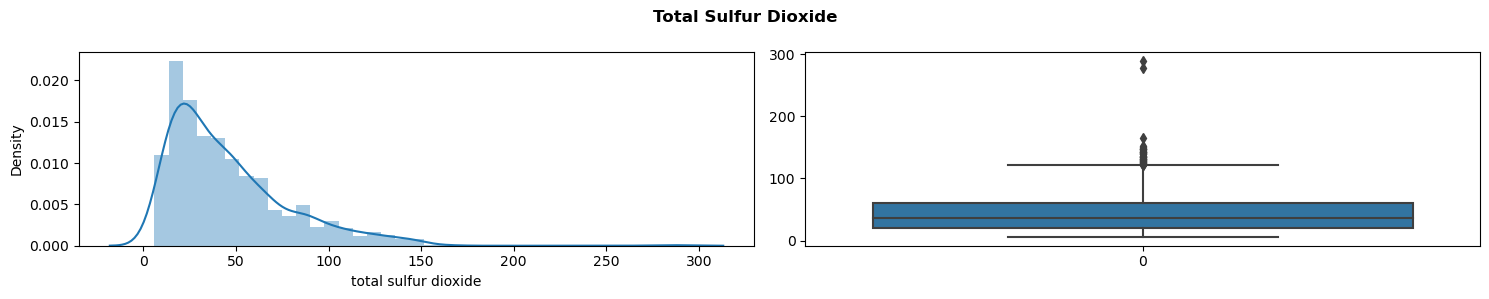

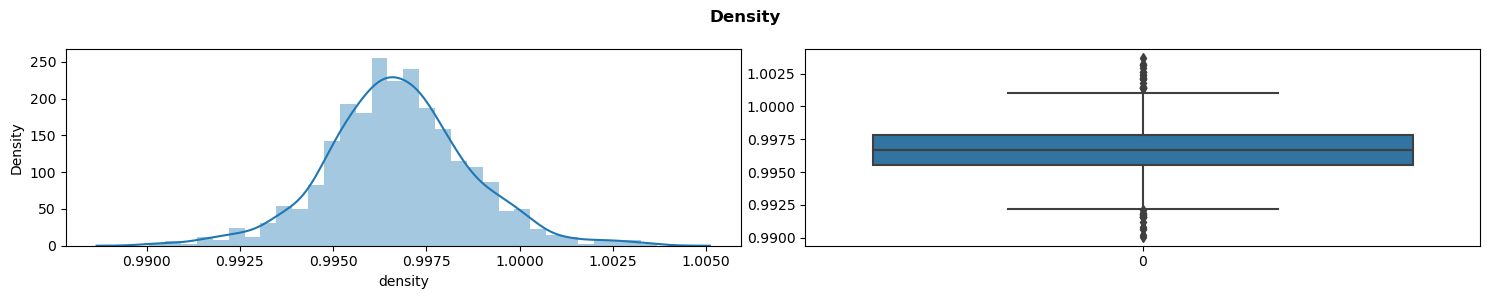

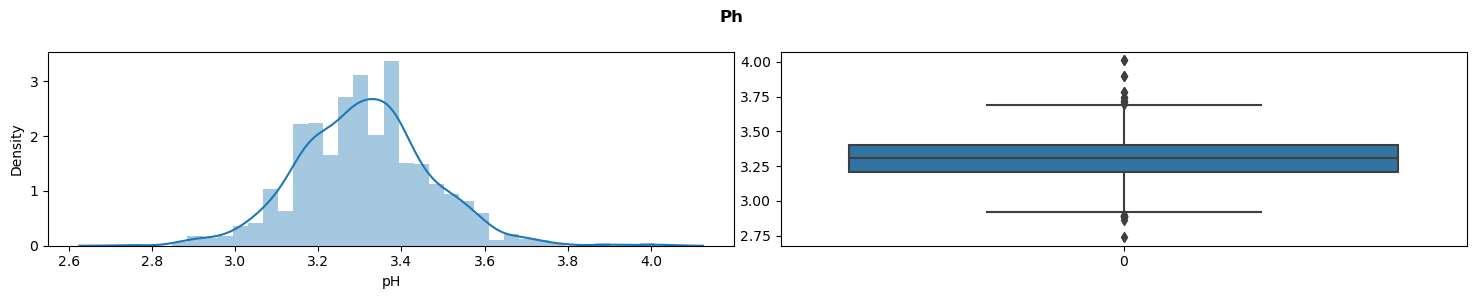

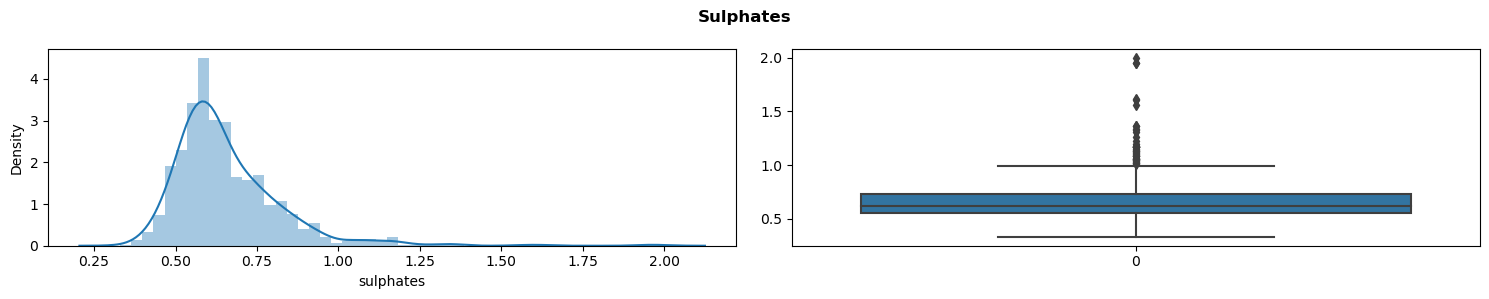

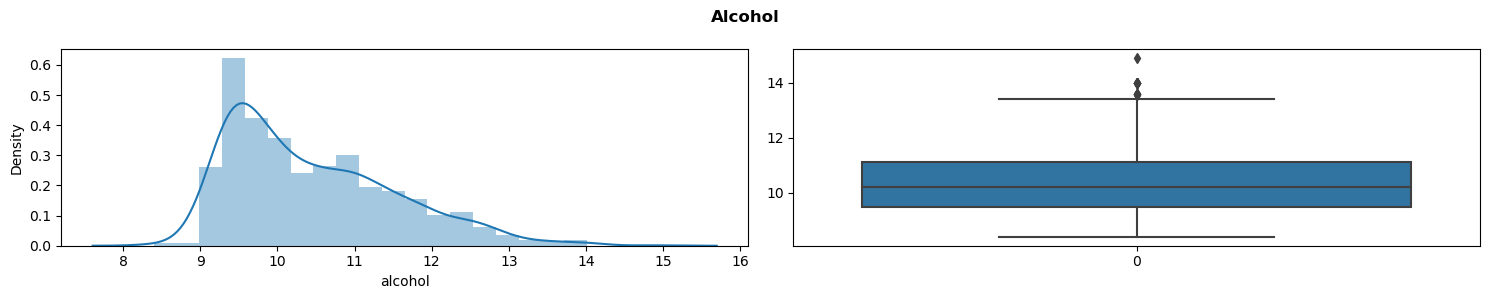

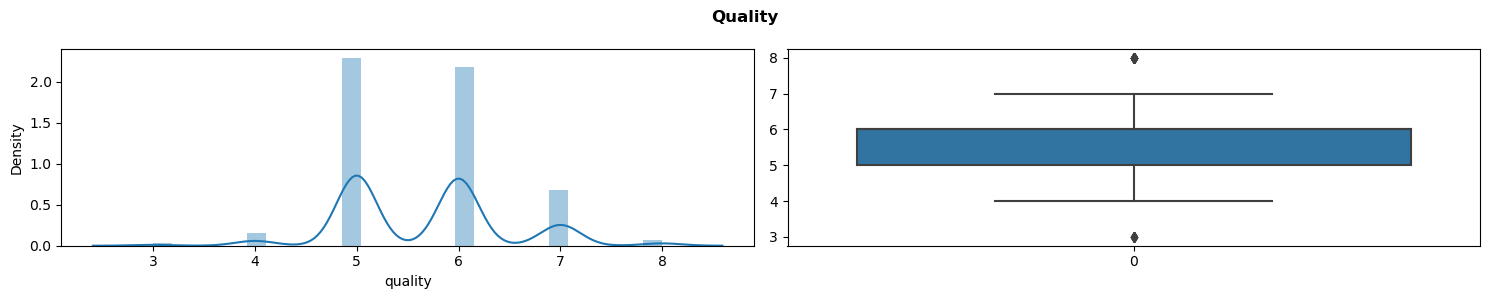

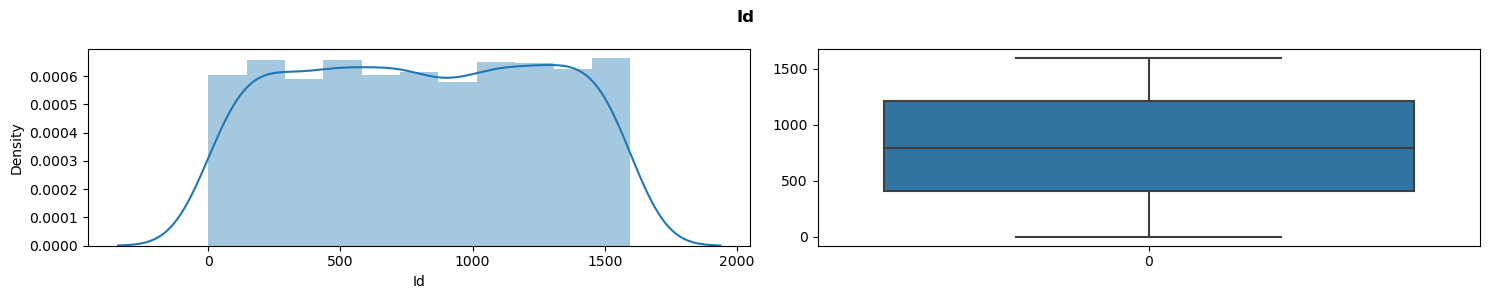

In [17]:
for col in df.columns.to_list():
    fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(15,3))
    sns.distplot(df[col], ax = ax[0])
    sns.boxplot(df[col], ax = ax[1])
    plt.suptitle(f'{col.title()}',weight='bold')
    plt.tight_layout()

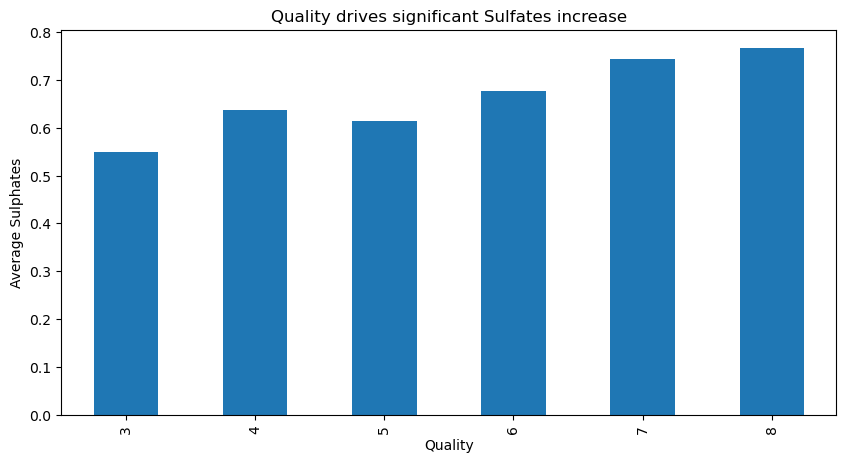

In [18]:
df.groupby(['quality'])['sulphates'].mean().plot(kind='bar', figsize=(10,5))
plt.xlabel('Quality')
plt.ylabel('Average Sulphates')
plt.title('Quality drives significant Sulfates increase')
plt.show()

In [19]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [20]:
dependent_var = df.quality

In [21]:
df.quality.value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
oversample = SMOTE(random_state=42)


In [24]:
X = df.drop(columns='quality')
y = df['quality']


In [25]:
# The rows and columns of X and y
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns before oversampling')
print(f'y has {y.shape[0]} rows before oversampling')

X has 1143 rows and 12 columns before oversampling
y has 1143 rows before oversampling


In [26]:
X, y = oversample.fit_resample(X,y)

In [27]:
y.value_counts()

quality
5    483
6    483
7    483
4    483
8    483
3    483
Name: count, dtype: int64

In [28]:
print(f'Number of rows after oversampling in X is {len(X)}')
print(f'Number of rows after oversampling in y is {len(y)}')

Number of rows after oversampling in X is 2898
Number of rows after oversampling in y is 2898


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [30]:
cal_vif(df[[i for i in df.describe().columns if i not in ['quality']]])

,variables,VIF
0,fixed acidity,80.835337
1,volatile acidity,17.046683
2,citric acid,9.247646
3,residual sugar,5.015133
4,chlorides,6.722839
5,free sulfur dioxide,6.578609
6,total sulfur dioxide,6.563281
7,density,1503.650040
8,pH,1078.262449
9,sulphates,21.727105


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2318, 12)
(580, 12)
(2318,)
(580,)


In [34]:
def predict(ml_model, model_name):

    '''
    Pass the model and predict value.
    Function will calculate all the eveluation metrics and appending those metrics score on model_result table.
    Plotting confusion_matrix and roc_curve for test data.
    '''

    # model fitting
    model = ml_model.fit(X_train, y_train)

    # predicting value and probability
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_prob = model.predict_proba(X_train)[:,1]
    y_test_prob = model.predict_proba(X_test)[:,1]


    ''' Performance Metrics '''
    # accuracy score  ---->  (TP+TN)/(TP+FP+TN+FN)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'train accuracy : {round(train_accuracy,3)}')
    print(f'test accuracy : {round(test_accuracy,3)}')

    # precision score  ---->  TP/(TP+FP)
    train_precision = precision_score(y_train, y_train_pred, average='micro')
    test_precision = precision_score(y_test, y_test_pred, average='micro')
    print(f'train precision : {round(train_precision,3)}')
    print(f'test precision : {round(test_precision,3)}')

    # recall score  ---->  TP/(TP+FN)
    train_recall = recall_score(y_train, y_train_pred, average='micro')
    test_recall = recall_score(y_test, y_test_pred, average='micro')
    print(f'train recall : {round(train_recall,3)}')
    print(f'test recall : {round(test_recall,3)}')

    # f1 score  ---->  Harmonic Mean of Precision and Recall
    train_f1 = f1_score(y_train, y_train_pred, average='micro')
    test_f1 = f1_score(y_test, y_test_pred, average='micro')
    print(f'train f1 : {round(train_f1,3)}')
    print(f'test f1 : {round(test_f1,3)}')



    # classification report
    print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
    print('-'*80)


    ''' plotting Confusion Matrix '''
    #ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
    #plt.title('confusion matrix on Test data', weight='bold')
    #plt.show()
    #print('-'*80)
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'], cmap="Greens", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'], cmap="Greens", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    model_score = [model_name,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1]
    return model_score

In [35]:
score = pd.DataFrame(index =['model_name','train_accuracy','test_accuracy','train_precision','test_precision','train_recall','test_recall','train_f1','test_f1',],)

train accuracy : 0.34
test accuracy : 0.312
train precision : 0.34
test precision : 0.312
train recall : 0.34
test recall : 0.312
train f1 : 0.34
test f1 : 0.312
classification report for test data 
              precision    recall  f1-score   support

           3       0.29      0.41      0.34        93
           4       0.42      0.36      0.39        94
           5       0.44      0.07      0.13        94
           6       0.00      0.00      0.00       106
           7       0.24      0.51      0.33        99
           8       0.35      0.55      0.43        94

    accuracy                           0.31       580
   macro avg       0.29      0.32      0.27       580
weighted avg       0.28      0.31      0.26       580

--------------------------------------------------------------------------------

Confusion Matrix:


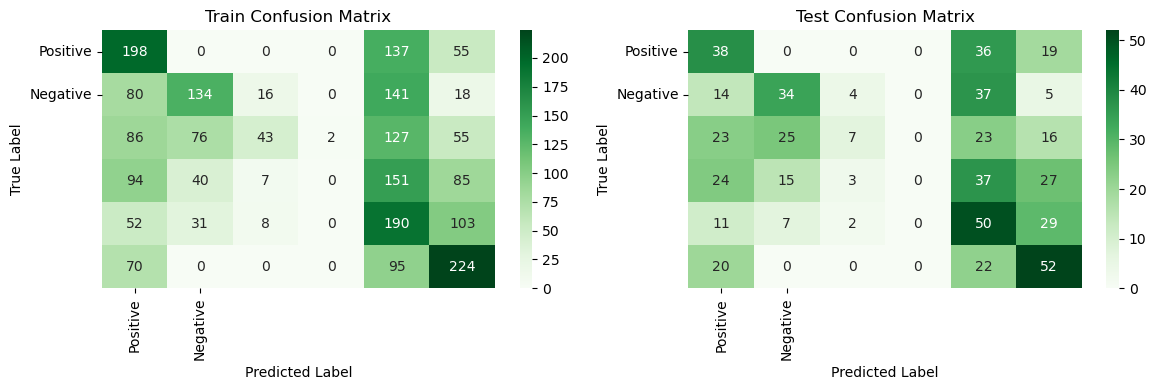

In [36]:
#module
svc = predict(SVC(probability=True), 'SVM')

In [37]:
score['SVM'] = svc
score

,SVM
model_name,SVM
train_accuracy,0.34038
test_accuracy,0.312069
train_precision,0.34038
test_precision,0.312069
train_recall,0.34038
test_recall,0.312069
train_f1,0.34038
test_f1,0.312069
